<a href="https://colab.research.google.com/github/JVR27XD/MobileSAM/blob/main/TensorRT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Clonación del repositorio
Clona el repositorio SegmentAnything-TensorRT desde GitHub.

Cambia el directorio actual de trabajo a la carpeta recién clonada.

In [ ]:
!git clone https://github.com/ItayElam/SegmentAnything-TensorRT.git
%cd SegmentAnything-TensorRT



Cloning into 'SegmentAnything-TensorRT'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 42 (delta 7), reused 41 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (42/42), 280.67 KiB | 5.73 MiB/s, done.
Resolving deltas: 100% (7/7), done.
/content/SegmentAnything-TensorRT


# Montaje de Google Drive y copia del modelo

Se sube Google Drive en el entorno de Colab para acceder a archivos personales desde /content/drive.

os.makedirs("checkpoints", exist_ok=True)

Crea una carpeta llamada checkpoints si no existe. Aquí se guardarán los modelos.

!cp ...

Copia el modelo preentrenado sam_vit_h_4b8939.pth desde el Google Drive a la carpeta checkpoints, renombrándolo como sam_vit_h.pth

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.makedirs("checkpoints", exist_ok=True)
!cp "/content/drive/MyDrive/Colab Notebooks/SAM_TENSOR/sam_vit_h_4b8939.pth" checkpoints/sam_vit_h.pth


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Instalar dependencias

In [ ]:
!pip install onnx onnxruntime onnxruntime-gpu nvidia-pyindex nvidia-tensorrt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 115.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 121.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.2/283.2 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.7 MB/s eta 0:00:00
  Created wheel for nvidia-pyindex: filename=nvidia_pyindex-1.0.9-py3-none-any.whl size=8419 sha256=3c776aaaafc4b997d5ebb9ac2eac578c8603382957539ad2431f291eafe879df
  Stored in directory: /

# Clonar Segment Anything oficial y renombrar


%cd /content

Asegura que se está en el directorio raíz del entorno de Colab antes de clonar el repositorio.

!git clone https://github.com/facebookresearch/segment-anything.git

 Clona el repositorio oficial de Facebook Research que contiene el modelo SAM y sus utilidades.

!mv segment-anything segment_anything

Renombra la carpeta clonada de segment-anything a segment_anything (usando guion bajo en lugar de guion medio), para evitar posibles conflictos de importación en Python.

In [ ]:
%cd /content
!git clone https://github.com/facebookresearch/segment-anything.git
!mv segment-anything segment_anything

/content
Cloning into 'segment-anything'...
remote: Enumerating objects: 304, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 304 (delta 2), reused 1 (delta 1), pack-reused 299 (from 2)
Receiving objects: 100% (304/304), 18.31 MiB | 44.64 MiB/s, done.
Resolving deltas: 100% (159/159), done.


# Instalar SAM como paquete Python local

In [ ]:

%cd /content/segment_anything
!pip install -e .

/content/segment_anything
Obtaining file:///content/segment_anything
  Preparing metadata (setup.py) ... done
  Running setup.py develop for segment_anything


# Volver al proyecto principal

In [ ]:

%cd /content/SegmentAnything-TensorRT


/content/SegmentAnything-TensorRT


# Instalar PyCUDA

In [ ]:
!pip install pycuda


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.6/105.6 kB 10.3 MB/s eta 0:00:00
  Created wheel for pycuda: filename=pycuda-2025.1.1-cp311-cp311-linux_x86_64.whl size=660712 sha256=1c24184f00c2f150b56b6bc67ece7adc5b1cbe54c25e73d31b868e517c986de5
  Stored in directory: /root/.cache/pip/wheels/49/0a/64/6530a5fde64f984ebb4992e38744fdfd2a61f510377b3a24d9
Successfully built pycuda


# Exportar a ONNX y TensorRT

Ejecuta el script main.py con el subcomando export.

Exporta el modelo SAM (sam_vit_h.pth) a:

ONNX (Open Neural Network Exchange): un formato intermedio para modelos de deep learning.

TensorRT: una versión optimizada del modelo ONNX para ejecución acelerada en GPU de NVIDIA.

--model_precision fp16: especifica que la exportación se realice en precisión flotante de 16 bits, lo cual:

Reduce el tamaño del modelo.

Mejora la velocidad de inferencia.

Usa menos memoria GPU.

In [ ]:
!python main.py export \
  --model_path checkpoints/sam_vit_h.pth \
  --model_precision fp16

Se han truncado las últimas 5000 líneas del flujo de salida.
  %/blocks.15/mlp/act/Div_output_0 : Float(*, *, *, 5120, device=cpu) = onnx::Div[onnx_name="/blocks.15/mlp/act/Div"](%/blocks.15/mlp/lin1/Add_output_0, %/blocks.15/mlp/act/Constant_output_0), scope: sam_modification.ImageEncoderModels.ImageEncoderViTFirstHalf::/segment_anything.modeling.image_encoder.Block::blocks.15/segment_anything.modeling.common.MLPBlock::mlp/torch.nn.modules.activation.GELU::act # /usr/local/lib/python3.11/dist-packages/torch/nn/modules/activation.py:734:0
  %/blocks.15/mlp/act/Erf_output_0 : Float(*, *, *, 5120, device=cpu) = onnx::Erf[onnx_name="/blocks.15/mlp/act/Erf"](%/blocks.15/mlp/act/Div_output_0), scope: sam_modification.ImageEncoderModels.ImageEncoderViTFirstHalf::/segment_anything.modeling.image_encoder.Block::blocks.15/segment_anything.modeling.common.MLPBlock::mlp/torch.nn.modules.activation.GELU::act # /usr/local/lib/python3.11/dist-packages/torch/nn/modules/activation.py:734:0
  %/blocks.

# Conversión de modelos ONNX a TensorRT (.engine)

Ejecuta el script export_engine.py, que:

Convierte modelos ONNX a modelos TensorRT (.engine) optimizados para GPUs NVIDIA.

Cada comando exporta uno de los dos bloques de inferencia del modelo SAM:

sam_vit_h_embedding_first.onnx → sam_vit_h_embedding_first.engine

sam_vit_h_embedding_second.onnx → sam_vit_h_embedding_second.engine

El flag --use_fp16 True indica que se use precisión FP16

In [ ]:
# Exportar primer modelo ONNX a ENGINE (.engine)
!python export_engine.py \
  --onnx_model_path exported_models/vit_h/sam_vit_h_embedding_first.onnx \
  --engine_output_path checkpoints/sam_vit_h_embedding_first.engine \
  --use_fp16 True

# Exportar segundo modelo ONNX a ENGINE (.engine)
!python export_engine.py \
  --onnx_model_path exported_models/vit_h/sam_vit_h_embedding_second.onnx \
  --engine_output_path checkpoints/sam_vit_h_embedding_second.engine \
  --use_fp16 True


✅ TensorRT engine successfully saved to checkpoints/sam_vit_h_embedding_first.engine
[06/16/2025-10:36:00] [TRT] [W] Detected layernorm nodes in FP16.
[06/16/2025-10:36:00] [TRT] [W] Running layernorm after self-attention with FP16 Reduce or Pow may cause overflow. Forcing Reduce or Pow Layers in FP32 precision, or exporting the model to use INormalizationLayer (available with ONNX opset >= 17) can help preserving accuracy.
✅ TensorRT engine successfully saved to checkpoints/sam_vit_h_embedding_second.engine


In [ ]:
import sys

# --- PASO 1: DEFINIR LA RUTA AL DIRECTORIO RAÍZ DEL PROYECTO ---
# Esta es la carpeta que contiene el directorio 'src'.
ruta_proyecto_tensorrt = '/content/SegmentAnything-TensorRT'

# --- PASO 2: ASEGURARSE DE QUE LA RUTA ESTÉ EN EL PATH DE PYTHON ---
# Este código se asegura de que no añadamos la ruta múltiples veces.
if ruta_proyecto_tensorrt not in sys.path:
    sys.path.append(ruta_proyecto_tensorrt)
    print(f"Ruta del proyecto añadida: {ruta_proyecto_tensorrt}")
else:
    print("La ruta del proyecto ya está en el path.")

# --- PASO 3: IMPORTAR USANDO LA RUTA COMPLETA ---
# Ahora que Python conoce la ruta al proyecto, podemos importar desde 'src.infer'.
try:
    # Como descubrimos, la clase InferenceEngine está dentro del archivo 'infer.py',
    # que a su vez está dentro de la carpeta 'src'.
    from src.infer import InferenceEngine

    print("\n✅ ¡Éxito! El módulo 'InferenceEngine' se ha importado correctamente.")

except ImportError as e:
    print(f"\nError de importación: {e}")
    print("Verifica que el archivo '/content/SegmentAnything-TensorRT/src/infer.py' existe y contiene la clase 'InferenceEngine'.")
except Exception as e:
    print(f"\nOcurrió un error inesperado: {e}")

La ruta del proyecto ya está en el path.

✅ ¡Éxito! El módulo 'InferenceEngine' se ha importado correctamente.


# Corrección e importación de módulos de SAM

Asegura que Python puede encontrar el paquete segment_anything:

Se añade manualmente la ruta al sistema (sys.path.append(...)).

Corrige errores comunes de importación:

Importa los módulos directamente desde sus archivos fuente:

sam_model_registry: permite registrar y cargar variantes del modelo SAM (por ejemplo, ViT-B, ViT-H...).

SamPredictor: clase que permite realizar inferencias (predict) con el modelo cargado.

Manejo de errores:

Si algo falla, muestra el mensaje correspondiente.

In [ ]:
import sys

# Ruta al directorio que CONTIENE el paquete
ruta_paquete = '/content/segment_anything'

# Añadimos la ruta (si no está ya)
if ruta_paquete not in sys.path:
    sys.path.append(ruta_paquete)

try:

    # Importamos cada objeto desde su archivo correcto.
    from segment_anything.build_sam import sam_model_registry
    from segment_anything.predictor import SamPredictor

    print("Los módulos se han importado correctamente.")
    print("SamPredictor y sam_model_registry están listos para ser usados.")

except ImportError as e:
    print(f" Un último error de importación: {e}")
except Exception as e:
    print(f" Ocurrió un error inesperado: {e}")

Los módulos se han importado correctamente.
SamPredictor y sam_model_registry están listos para ser usados.


In [ ]:
import sys

# --- PASO 1: DEFINIR LA RUTA AL DIRECTORIO RAÍZ DEL PROYECTO ---
# Esta es la carpeta que contiene el directorio 'src'.
ruta_proyecto_tensorrt = '/content/SegmentAnything-TensorRT'

# --- PASO 2: ASEGURARSE DE QUE LA RUTA ESTÉ EN EL PATH DE PYTHON ---
# Este código se asegura de que no añadamos la ruta múltiples veces.
if ruta_proyecto_tensorrt not in sys.path:
    sys.path.append(ruta_proyecto_tensorrt)
    print(f"Ruta del proyecto añadida: {ruta_proyecto_tensorrt}")
else:
    print("La ruta del proyecto ya está en el path.")

# --- PASO 3: IMPORTAR USANDO LA RUTA COMPLETA ---
# Ahora que Python conoce la ruta al proyecto, podemos importar desde 'src.infer'.
try:

    from src.infer import InferenceEngine

    print("\n¡Éxito! El módulo 'InferenceEngine' se ha importado correctamente.")

except ImportError as e:
    print(f"\nError de importación: {e}")
    print("Verifica que el archivo '/content/SegmentAnything-TensorRT/src/infer.py' existe y contiene la clase 'InferenceEngine'.")
except Exception as e:
    print(f"\n Ocurrió un error inesperado: {e}")

La ruta del proyecto ya está en el path.

¡Éxito! El módulo 'InferenceEngine' se ha importado correctamente.


In [ ]:
!rm -rf /content/SegmentAnything-TensorRT/src/__pycache__
print("✅Caché de Python limpiada.")

✅ Caché de Python limpiada.


# Creación del motor de inferencia (InferenceEngine)

Este bloque prepara e inicializa todo lo necesario para que el motor SAM en TensorRT pueda funcionar con las imágenes, utilizando los modelos previamente exportados.

In [ ]:

import sys
import tensorrt as trt
import os

print(f"Versión de TensorRT: {trt.__version__}")
print("-" * 40)

ruta_proyecto = '/content/SegmentAnything-TensorRT'
if ruta_proyecto not in sys.path:
    sys.path.append(ruta_proyecto)
    print(f"Ruta del proyecto añadida: {ruta_proyecto}")
else:
    print("La ruta del proyecto ya está en el path.")

# --- LÓGICA DEL PROGRAMA ---
try:
    # 1. Importamos el MÓDULO entero ('infer'), no solo la clase
    import src.infer
    print("✅ Módulo 'src.infer' importado.")

    # 2. "Inyectamos" la librería 'trt' en el módulo 'infer'
    # Esto asegura que cualquier código dentro de 'infer.py' tenga acceso a 'trt'.
    src.infer.trt = trt
    print("✅ Dependencia 'trt' inyectada manualmente en 'src.infer'.")

    # 3. Definimos las rutas a los modelos
    pth_path = "/content/SegmentAnything-TensorRT/checkpoints/sam_vit_h.pth"
    trt_model_1 = "/content/SegmentAnything-TensorRT/checkpoints/sam_vit_h_embedding_first.engine"
    trt_model_2 = "/content/SegmentAnything-TensorRT/checkpoints/sam_vit_h_embedding_second.engine"
    print("Rutas a los modelos definidas.")

    # 4. Creamos la instancia usando la clase del módulo que hemos modificado
    print("\nCreando la instancia de InferenceEngine...")
    engine = src.infer.InferenceEngine(
        pth_path=pth_path,
        trt_model_1=trt_model_1,
        trt_model_2=trt_model_2
    )
    print("\n ✅Objeto 'engine' creado sin errores.")

except Exception as e:
    print(f"\n❌ Ocurrió un error: {e}")

Versión de TensorRT: 10.12.0.36
----------------------------------------
La ruta del proyecto ya está en el path.
✅ Módulo 'src.infer' importado.
✅ Dependencia 'trt' inyectada manualmente en 'src.infer'.
Rutas a los modelos definidas.

Creando la instancia de InferenceEngine...

 ✅Objeto 'engine' creado sin errores.


Imagen cargada y punto definido en [[182 424]].


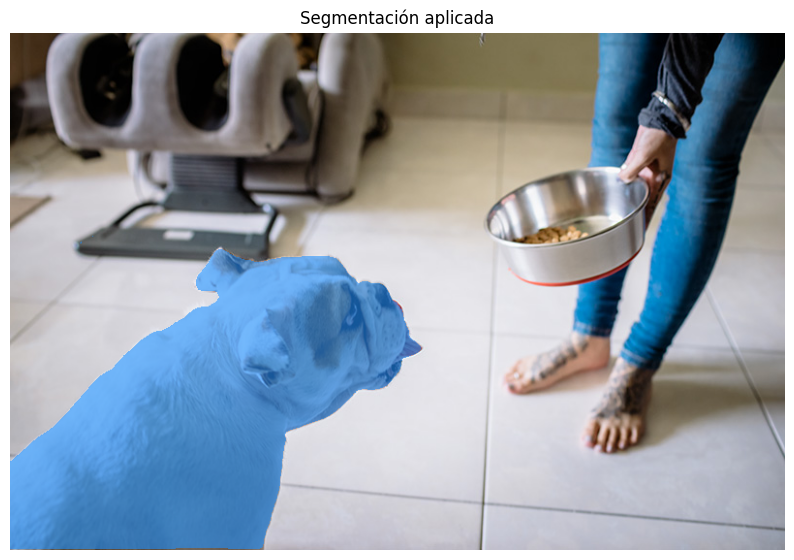

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Carga la imagen
image_path = "/content/SegmentAnything-TensorRT/images/original_image.jpg"
if not os.path.exists(image_path):
    raise FileNotFoundError(f"No se encontró la imagen en {image_path}")

image_bgr = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Define el punto y etiqueta para el prompt
input_point = np.array([[182, 424]])
input_label = np.array([1])  # 1 para foreground

print(f"Imagen cargada y punto definido en {input_point}.")

# Ejecuta la inferencia con el engine
output_image = engine(image_rgb, input_point, input_label)


# Visualización con matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(output_image.astype(np.uint8))
plt.title("Segmentación aplicada")
plt.axis('off')
plt.show()


Imagen cargada y punto definido en [[1759  831]].


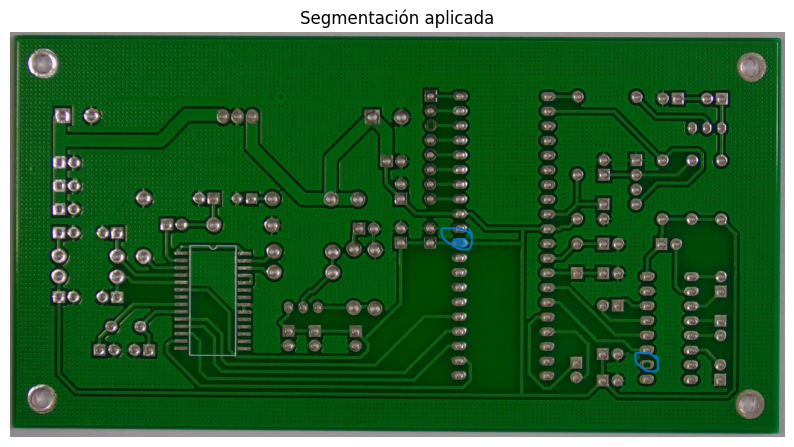

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Carga la imagen
image_path = "/content/SegmentAnything-TensorRT/images/01_missing_hole_01.jpg"
if not os.path.exists(image_path):
    raise FileNotFoundError(f"No se encontró la imagen en {image_path}")

image_bgr = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Define el punto y etiqueta para el prompt
input_point = np.array([[1759, 831],



                        ])

input_label = np.array([1])

print(f"Imagen cargada y punto definido en {input_point}.")

# Ejecuta la inferencia con el engine
output_image = engine(image_rgb, input_point, input_label)


# Visualización con matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(output_image.astype(np.uint8))
plt.title("Segmentación aplicada")
plt.axis('off')


plt.show()

In [ ]:
import time
import torch

# Liberar caché de GPU antes de medir
torch.cuda.reset_peak_memory_stats()
torch.cuda.synchronize()
start_time = time.perf_counter()

# Ejecutar inferencia con TensorRT
output_image = engine(image_rgb, input_point, input_label)

torch.cuda.synchronize()
end_time = time.perf_counter()

# Tiempo total de inferencia
inference_time = end_time - start_time
# Memoria máxima usada en GPU
memory_used_mb = torch.cuda.max_memory_allocated() / (1024 ** 2)

print(f"🕒 Tiempo de inferencia: {inference_time:.4f} segundos")
print(f"💾 Memoria GPU usada: {memory_used_mb:.2f} MB")


🕒 Tiempo de inferencia: 2.4001 segundos
💾 Memoria GPU usada: 5737.77 MB


In [ ]:
print(type(engine.currentModel.context1))


<class 'tensorrt_bindings.tensorrt.IExecutionContext'>


In [ ]:
!ls -l /content/SegmentAnything-TensorRT/images/

total 332
-rw-r--r-- 1 root root 99846 Jun 16 10:15 original_image.jpg
-rw-r--r-- 1 root root 25039 Jun 16 10:15 vit_b_Mask_Original.png
-rw-r--r-- 1 root root 25957 Jun 16 10:15 vit_b_Mask_TensorRT_FP16.png
-rw-r--r-- 1 root root 24976 Jun 16 10:15 vit_b_Mask_TensorRT.png
-rw-r--r-- 1 root root 23657 Jun 16 10:15 vit_h_Mask_Original.png
-rw-r--r-- 1 root root 24672 Jun 16 10:15 vit_h_Mask_TensorRT_FP16.png
-rw-r--r-- 1 root root 23573 Jun 16 10:15 vit_h_Mask_TensorRT.png
-rw-r--r-- 1 root root 23551 Jun 16 10:15 vit_l_Mask_Original.png
-rw-r--r-- 1 root root 24547 Jun 16 10:15 vit_l_Mask_TensorRT_FP16.png
-rw-r--r-- 1 root root 23467 Jun 16 10:15 vit_l_Mask_TensorRT.png
